# Homework 2: Classification

아래 데이터는 이번 과제에 사용할 "Cardio" 데이터입니다.   

각 컬럼에 대한 간단한 설명은 다음과 같습니다. 
1.	Age: 나이 (integer)   
2.	Height: 키(cm) (float)   
3.	Weight: 몸무게(kg) (float)   
4.	Gender: 성별 {‘M’, ‘F’} (binary)   
5.	Ap_hi: 수축기 혈압 (integer)   
6.	Ap_lo: 이완기 혈압 (integer)   
7.	Cholesterol: 콜레스테롤 상태 (categorical)   
8.	Gluc: 포도당 상태 (categorical)   
9.	Smoke: 흡연 여부 (binary)   
10.	Alco: 음주 여부 (binary)    
11.	Active: 신체 활동(운동) 여부 (binary)   
12.	Cardio: 심혈관계질환 여부 (binary, target variable)    

종속변수는 cardio입니다.

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./Cardio.csv')

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,F,155,69.0,130,80,above normal,above normal,no,no,yes,no
1,40,F,163,71.0,110,70,normal,normal,no,no,yes,yes
2,60,F,165,70.0,120,80,normal,normal,no,no,yes,no
3,39,M,165,85.0,120,80,normal,normal,yes,yes,yes,no
4,64,F,155,62.0,120,80,normal,normal,no,no,yes,no


In [4]:
df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].head()

,age,height,weight,ap_hi,ap_lo
0,61,155,69.0,130,80
1,40,163,71.0,110,70
2,60,165,70.0,120,80
3,39,165,85.0,120,80
4,64,155,62.0,120,80


## Question 
심혈관계질환 여부 ('cardio' = 1 or 0)을 예측하는 classification 문제를 해결하세요.

## [Guidline]
0. [주어진 데이터를 모델에 사용할 수 있도록 전처리해주세요.](#0)
1. [train과 test를 8:2로 나눠주세요.](#1)   
2. [train에 대해서 로지스틱 모델을 학습시키고 모델을 평가해주세요.](#2)
3. [train에 대해서 트리 모델을 학습시키고 모델을 평가해주세요.](#3)  
4. [train에 대해서 랜덤 포레스트 모델을 학습시키고 모델을 평가해주세요.](#4)
5. [트리 모델과 랜덤 포레스트 모델의 성능을 비교하고 왜 그런 차이가 났는 지 설명하세요.](#5)  
    * 주피터 마크다운에 간략하게 적어 주시면 됩니다.

<a id='0'></a>

## [0. 주어진 데이터를 모델에 사용할 수 있도록 전처리해주세요.](#0)

Hint: cardio 데이터를 종속 변수로 사용하려면 no:0, yes:1 에 대응이 되야 하며 여러 numeric값이 아닌 다른 컬럼들에 대해서도 __비슷한__ 전처리가 가능합니다.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  int64  
 1   gender       69301 non-null  object 
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  object 
 7   gluc         69301 non-null  object 
 8   smoke        69301 non-null  object 
 9   alco         69301 non-null  object 
 10  active       69301 non-null  object 
 11  cardio       69301 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 6.3+ MB


먼저 numeric값이 아닌 컬럼 중에 0 또는 1로 이진분류가 되는 것은 각각의 값이 대응되도록 전처리

In [6]:
gender_dict = {'M':1, 'F':0}
smoke_dict = {'yes':1, 'no':0}
alco_dict = {'yes':1, 'no':0}
active_dict = {'yes':1, 'no':0}
cardio_dict = {'yes':1, 'no':0}

df['gender'] = df['gender'].map(gender_dict)
df['smoke'] = df['smoke'].map(smoke_dict)
df['alco'] = df['alco'].map(alco_dict)
df['active'] = df['active'].map(active_dict)
df['cardio'] = df['cardio'].map(cardio_dict)

df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,61,0,155,69.0,130,80,above normal,above normal,0,0,1,0
1,40,0,163,71.0,110,70,normal,normal,0,0,1,1
2,60,0,165,70.0,120,80,normal,normal,0,0,1,0
3,39,1,165,85.0,120,80,normal,normal,1,1,1,0
4,64,0,155,62.0,120,80,normal,normal,0,0,1,0


값이 3개 이상으로 분류되는 것은 one-hot-encoding을 한다

In [7]:
df_ohe = pd.get_dummies(df)
df_ohe

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_above normal,cholesterol_normal,cholesterol_well above normal,gluc_above normal,gluc_normal,gluc_well above normal
0,61,0,155,69.0,130,80,0,0,1,0,1,0,0,1,0,0
1,40,0,163,71.0,110,70,0,0,1,1,0,1,0,0,1,0
2,60,0,165,70.0,120,80,0,0,1,0,0,1,0,0,1,0
3,39,1,165,85.0,120,80,1,1,1,0,0,1,0,0,1,0
4,64,0,155,62.0,120,80,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69296,52,1,168,76.0,120,80,1,0,1,0,0,1,0,0,1,0
69297,61,0,158,126.0,140,90,0,0,1,1,1,0,0,1,0,0
69298,52,1,183,105.0,180,90,0,1,0,1,0,0,1,0,1,0
69299,61,0,163,72.0,135,80,0,0,0,1,0,1,0,1,0,0


결과 값 y에 해당하는 cardio와 나머지 변수에 해당하는 컬럼들을 분리

In [8]:
label = df_ohe.pop('cardio')
df_ohe = pd.concat([df_ohe, label], axis = 1)
X_ohe = df_ohe.iloc[:, :-1]
y_ohe = df_ohe.iloc[:, -1]

<a id='1'></a>

## [1. train과 test를 8:2로 나눠주세요.](#0)

위에서 전처리 후 생성한 X_ohe와 y_ohe을 train_test_split() 함수를 통해 8:2로 나눔

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ohe,
                                                    y_ohe,
                                                    test_size=0.2,
                                                    random_state= 1000)

<a id='2'></a>

## [2. train에 대해서 로지스틱 모델을 학습시키고 모델을 평가해주세요.](#0)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

logistic = LogisticRegression()
logistic.fit(X_train, y_train)

C:\Users\PIAI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
train_pred = logistic.predict(X_train)
test_pred = logistic.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred),3))

Train Data
정확도:  0.709
Test Data
정확도:  0.71


로지스틱 회귀 모델의 accuracy는 Train set에서의 결과보다 Test set에서의 결과가 더 좋게 나왔으며 정확도는 0.71이다.

<a id='3'></a>

## [3. train에 대해서 트리 모델을 학습시키고 모델을 평가해주세요.](#0)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
train_pred_tree = tree.predict(X_train)
test_pred_tree = tree.predict(X_test)

In [14]:
print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_tree),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_tree),3))

Train Data
정확도:  0.981
Test Data
정확도:  0.633


Train Data에서는 0.981이라는 높은 정확도를 보여주지만 Test Data에서 0.636의 낮은 정확도를 보여준다.  
복잡한 트리는 기존에 있는 데이터들은 잘 예측하나, 새로운 데이터는 잘 예측하지 못하고 있음을 보여주는 예이다.  
그래서 적당한 가지에서 잘라내야한다. (pruning)

In [15]:
from sklearn.model_selection import cross_val_score

# max_depth를 5으로 설정
trimed_tree = DecisionTreeClassifier(max_depth = 5)
trimed_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [16]:
train_pred_trimed = trimed_tree.predict(X_train)
test_pred_trimed = trimed_tree.predict(X_test)

cv_tree = DecisionTreeClassifier(max_depth = 5)
cv_score_tree = cross_val_score(cv_tree, X_train, y_train, cv=5, scoring="accuracy")

print(f"교차 검증 점수: {cv_score_tree}".format(cv_score_tree.mean()))
print("교차 검증 평균 점수: {:.2f}".format(cv_score_tree.mean()))

교차 검증 점수: [0.73466811 0.72763348 0.72402597 0.73511905 0.72907648]
교차 검증 평균 점수: 0.73


In [17]:
print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_trimed),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_trimed),3))

Train Data
정확도:  0.732
Test Data
정확도:  0.732


criterion = 'entropy' 설정의 경우,

In [18]:
tree_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
tree_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [19]:
train_pred_entropy = tree_entropy.predict(X_train)
test_pred_entropy = tree_entropy.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_entropy),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_entropy),3))

Train Data
정확도:  0.732
Test Data
정확도:  0.732


<a id='4'></a>

## [4. train에 대해서 랜덤 포레스트 모델을 학습시키고 모델을 평가해주세요.](#0)

In [20]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
train_pred_randomforest = randomforest.predict(X_train)
test_pred_randomforest = randomforest.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_randomforest),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_randomforest),3))

Train Data
정확도:  0.981
Test Data
정확도:  0.706


In [23]:
print("특성 중요도 : ",randomforest.feature_importances_)

특성 중요도 :  [0.17295709 0.01469541 0.21144419 0.23577921 0.18284243 0.10024644
 0.00904789 0.00762579 0.01356779 0.00536109 0.01626281 0.01605335
 0.00399384 0.00597225 0.00415043]


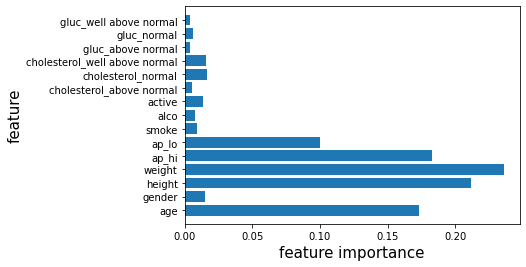

In [24]:
import matplotlib.pyplot as plt

aa = df_ohe.iloc[:,:-1]

n_feature = aa.shape[1]
index = np.arange(n_feature)

plt.barh(index, randomforest.feature_importances_, align='center')
plt.yticks(index, aa.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

시각화 결과 ap_hi, weight, height, age 네 가지 요소가 모델에 가장 큰 영향을 미치는 것으로 나타난다.

최적의 parameter를 탐색한다.

In [25]:
from sklearn.model_selection import GridSearchCV
import time

start = time.time()  # 시작 시간 저장

param_grid = [
    {'n_estimators': [100,200,300,400,500], 'max_features': ['auto', 'log2'], 'max_depth': [3, 5, 10]},
  ]

randomforest_grid = RandomForestClassifier(random_state=1000)

grid_search = GridSearchCV(randomforest_grid, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

print("time :", time.time() - start)  # 실행 시간 = 현재시각 - 시작시간 

time : 972.0451776981354


In [26]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}
RandomForestClassifier(max_depth=10, n_estimators=500, random_state=1000)


찾은 최적의 parameter를 넣어서 RandomForestClassifier 모델을 생성한다.

In [27]:
randomforest_best = RandomForestClassifier(n_estimators=500, max_features='auto', random_state=1000, n_jobs = -1, max_depth=10)
randomforest_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=-1,
                       random_state=1000)

In [28]:
train_pred_randomforest_best = randomforest_best.predict(X_train)
test_pred_randomforest_best = randomforest_best.predict(X_test)

print('Train Data')
print('정확도: ', round(accuracy_score(y_train, train_pred_randomforest_best),3))
print('Test Data')
print('정확도: ', round(accuracy_score(y_test, test_pred_randomforest_best),3))

Train Data
정확도:  0.75
Test Data
정확도:  0.735


In [29]:
print("특성 중요도 : ",randomforest_best.feature_importances_)

특성 중요도 :  [0.11776411 0.00503284 0.02741118 0.05627296 0.45431454 0.19676173
 0.00532536 0.00430548 0.0085206  0.01045348 0.0466487  0.0504943
 0.00321514 0.00790869 0.0055709 ]


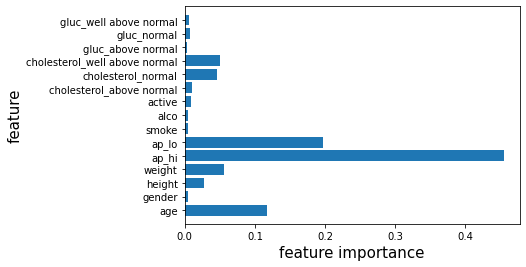

In [30]:
import matplotlib.pyplot as plt

aa = df_ohe.iloc[:,:-1]

n_feature = aa.shape[1]
index = np.arange(n_feature)

plt.barh(index, randomforest_best.feature_importances_, align='center')
plt.yticks(index, aa.columns)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

최적의 parameter로 학습한 모델의 결과, 모델의에 가장 큰 영향을 주는 요소는 ap_hi이고 그 다음으로 ap_lo와 age로 확인할 수 있다.

## [5. 트리 모델과 랜덤 포레스트 모델의 성능을 비교하고 왜 그런 차이가 났는 지 설명하세요.](#0)

결과적으로 각각의 모델에서 가장 좋은 결과는 다음과 같다.  
트리 모델을 사용했을 때의 Accuracy는 0.732  
랜덤 포레스트를 사용했을 때의 Accuracy는 0.735  

랜덤 포레스트의 경우, 최적의 parameter를 찾아서 학습한 모델이 트리 모델보다 정확도가 조금 더 높게 나왔다.  
max_depth를 설정하지 않았을 경우, 앙상블 모델인 랜덤포레스트가 다수의 의사결정 트리를 만들고 결과를 나타내기 때문에  
확실히 오버피팅을 방지하여 Test set에 대한 정확도가 더 높게 나왔다.  
그러나 똑같이 max_depth를 어느정도 설정했을 때에는 두 모델의 정확도 차이가 거의 나지 않음을 확인 할 수 있었다.